# Introduction to APIs for Data Acquisition: Johannesburg Weather Data

## 0. Requirements

In [63]:
pip install openmeteo-requests --quiet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [64]:
pip install requests-cache retry-requests numpy pandas --quiet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [65]:
import openmeteo_requests

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import requests_cache
from retry_requests import retry

## 1. Data Extraction

In [66]:
# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)


In [67]:

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": 26.21,
	"longitude": 28.03,
	"start_date": "2025-04-28",
	"end_date": "2025-05-12",
	"daily": ["temperature_2m_mean", "temperature_2m_max", "temperature_2m_min", "daylight_duration", "precipitation_sum", "rain_sum", "wind_speed_10m_max", "weather_code"],
	"hourly": ["temperature_2m", "relative_humidity_2m", "surface_pressure", "rain", "cloud_cover", "wind_speed_100m", "wind_direction_100m", "soil_temperature_28_to_100cm", "soil_moisture_28_to_100cm"],
	"models": "best_match"
}

In [68]:
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()}{response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

Coordinates 26.186290740966797°N 28.026317596435547°E
Elevation 414.0 m asl
Timezone NoneNone
Timezone difference to GMT+0 0 s


## 3. Trend Analysis

### Hourly Data Analysis

In [ ]:
# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
hourly_relative_humidity_2m = hourly.Variables(1).ValuesAsNumpy()
hourly_surface_pressure = hourly.Variables(2).ValuesAsNumpy()
hourly_rain = hourly.Variables(3).ValuesAsNumpy()
hourly_cloud_cover = hourly.Variables(4).ValuesAsNumpy()
hourly_wind_speed_100m = hourly.Variables(5).ValuesAsNumpy()
hourly_wind_direction_100m = hourly.Variables(6).ValuesAsNumpy()
hourly_soil_temperature_28_to_100cm = hourly.Variables(7).ValuesAsNumpy()
hourly_soil_moisture_28_to_100cm = hourly.Variables(8).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}

hourly_data["temperature_2m"] = hourly_temperature_2m
hourly_data["relative_humidity_2m"] = hourly_relative_humidity_2m
hourly_data["surface_pressure"] = hourly_surface_pressure
hourly_data["rain"] = hourly_rain
hourly_data["cloud_cover"] = hourly_cloud_cover
hourly_data["wind_speed_100m"] = hourly_wind_speed_100m
hourly_data["wind_direction_100m"] = hourly_wind_direction_100m
hourly_data["soil_temperature_28_to_100cm"] = hourly_soil_temperature_28_to_100cm
hourly_data["soil_moisture_28_to_100cm"] = hourly_soil_moisture_28_to_100cm



hourly_dataframe = pd.DataFrame(data = hourly_data)

In [70]:
hourly_dataframe

,date,temperature_2m,relative_humidity_2m,surface_pressure,rain,cloud_cover,wind_speed_100m,wind_direction_100m,soil_temperature_28_to_100cm,soil_moisture_28_to_100cm
0,2025-04-28 00:00:00+00:00,19.87,26.72,966.05,0.00,0.00,25.37,21.65,22.17,0.01
1,2025-04-28 01:00:00+00:00,19.02,28.58,965.35,0.00,0.00,20.30,24.07,22.22,0.01
2,2025-04-28 02:00:00+00:00,18.52,30.24,965.17,0.00,0.00,19.74,24.23,22.22,0.01
3,2025-04-28 03:00:00+00:00,18.07,32.02,964.91,0.00,0.00,19.52,32.96,22.22,0.01
4,2025-04-28 04:00:00+00:00,18.12,32.61,965.11,0.00,0.00,18.69,38.75,22.22,0.01
...,...,...,...,...,...,...,...,...,...,...
355,2025-05-12 19:00:00+00:00,28.22,18.62,966.28,0.00,33.00,12.86,46.70,23.37,0.01
356,2025-05-12 20:00:00+00:00,27.27,19.61,966.24,0.00,1.00,11.89,57.99,23.37,0.01
357,2025-05-12 21:00:00+00:00,26.47,20.19,965.93,0.00,1.00,10.20,69.33,23.37,0.01
358,2025-05-12 22:00:00+00:00,25.67,21.02,965.42,0.00,0.00,6.70,83.83,23.37,0.01


In [71]:
# Convert dict to DataFrame
hourly_data = pd.DataFrame(hourly_data)

# If 'date' is a column with datetime-like strings, convert it
hourly_data['date'] = pd.to_datetime(hourly_data['date'])

# Now extract only the date part
hourly_data['only_date'] = hourly_data['date'].dt.date

In [72]:
hourly_data

,date,temperature_2m,relative_humidity_2m,surface_pressure,rain,cloud_cover,wind_speed_100m,wind_direction_100m,soil_temperature_28_to_100cm,soil_moisture_28_to_100cm,only_date
0,2025-04-28 00:00:00+00:00,19.87,26.72,966.05,0.00,0.00,25.37,21.65,22.17,0.01,2025-04-28
1,2025-04-28 01:00:00+00:00,19.02,28.58,965.35,0.00,0.00,20.30,24.07,22.22,0.01,2025-04-28
2,2025-04-28 02:00:00+00:00,18.52,30.24,965.17,0.00,0.00,19.74,24.23,22.22,0.01,2025-04-28
3,2025-04-28 03:00:00+00:00,18.07,32.02,964.91,0.00,0.00,19.52,32.96,22.22,0.01,2025-04-28
4,2025-04-28 04:00:00+00:00,18.12,32.61,965.11,0.00,0.00,18.69,38.75,22.22,0.01,2025-04-28
...,...,...,...,...,...,...,...,...,...,...,...
355,2025-05-12 19:00:00+00:00,28.22,18.62,966.28,0.00,33.00,12.86,46.70,23.37,0.01,2025-05-12
356,2025-05-12 20:00:00+00:00,27.27,19.61,966.24,0.00,1.00,11.89,57.99,23.37,0.01,2025-05-12
357,2025-05-12 21:00:00+00:00,26.47,20.19,965.93,0.00,1.00,10.20,69.33,23.37,0.01,2025-05-12
358,2025-05-12 22:00:00+00:00,25.67,21.02,965.42,0.00,0.00,6.70,83.83,23.37,0.01,2025-05-12


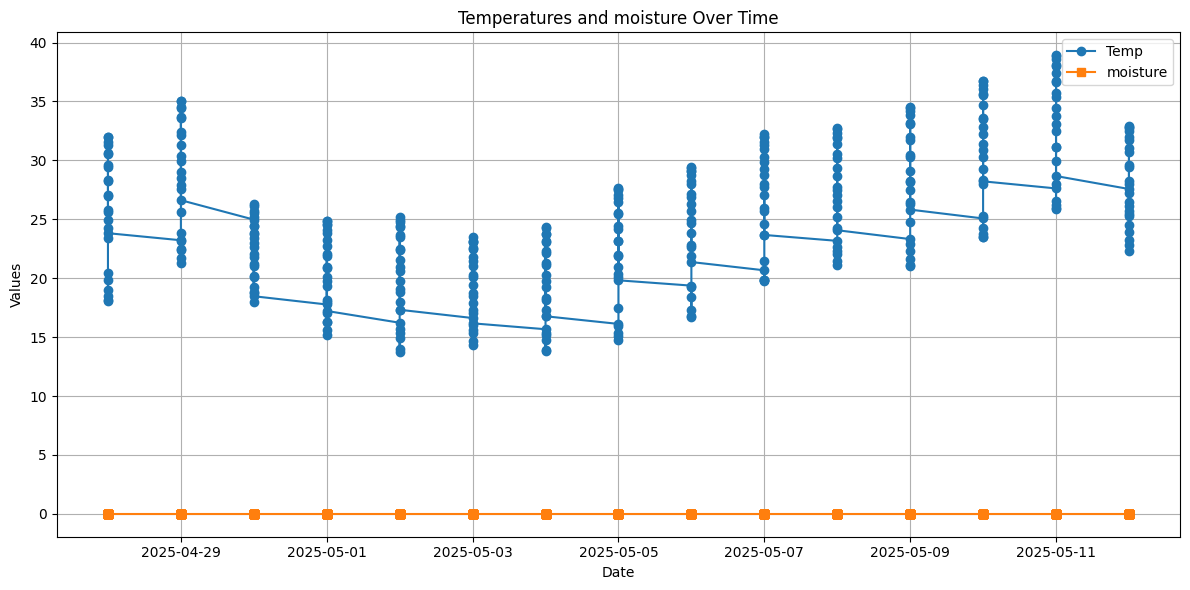

In [73]:
plt.figure(figsize=(12, 6))
plt.plot(hourly_data['only_date'], hourly_data['temperature_2m'], marker='o', label='Temp')
plt.plot(hourly_data['only_date'], hourly_data['soil_moisture_28_to_100cm'], marker='s', label='moisture')
plt.title('Temperatures and moisture Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

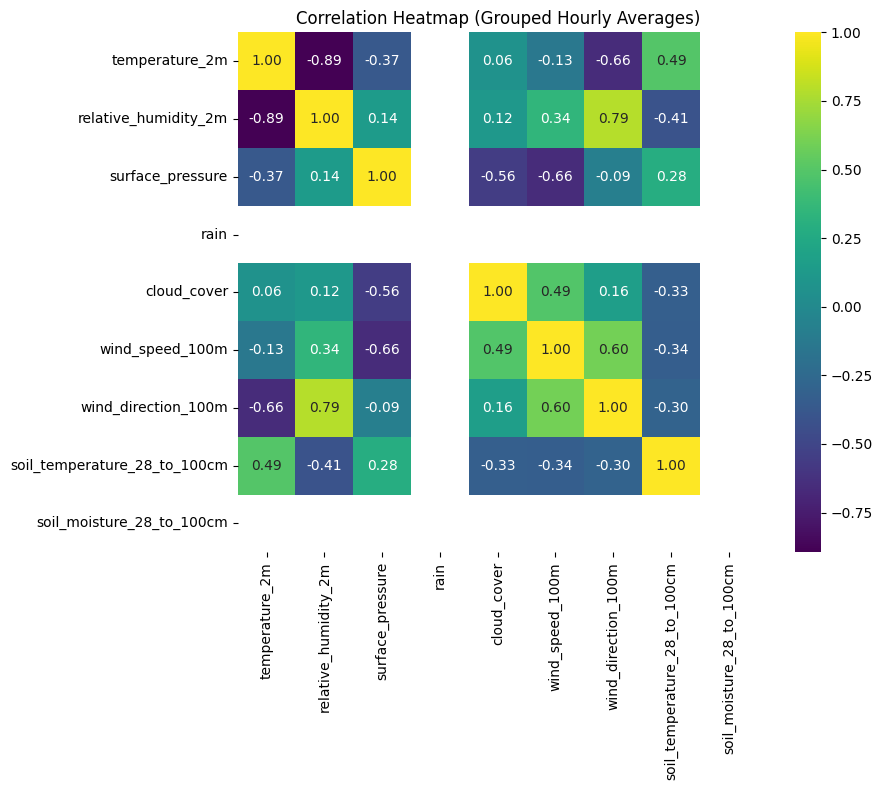

In [74]:
# Group hourly data by date, then take mean of numeric columns
hourly_dataframe['only_date'] = pd.to_datetime(hourly_dataframe['date']).dt.date
grouped = hourly_dataframe.groupby('only_date').mean(numeric_only=True)

# correlation and heatmap
corr_grouped = grouped.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_grouped, annot=True, fmt='.2f', cmap='viridis', square=True)
plt.title('Correlation Heatmap (Grouped Hourly Averages)')
plt.tight_layout()
plt.show()

### Daily Data Analysis

In [75]:
# Process daily data. The order of variables needs to be the same as requested.
daily = response.Daily()
daily_temperature_2m_mean = daily.Variables(0).ValuesAsNumpy()
daily_temperature_2m_max = daily.Variables(1).ValuesAsNumpy()
daily_temperature_2m_min = daily.Variables(2).ValuesAsNumpy()
daily_daylight_duration = daily.Variables(3).ValuesAsNumpy()
daily_precipitation_sum = daily.Variables(4).ValuesAsNumpy()
daily_rain_sum = daily.Variables(5).ValuesAsNumpy()
daily_wind_speed_10m_max = daily.Variables(6).ValuesAsNumpy()
daily_weather_code = daily.Variables(7).ValuesAsNumpy()

daily_data = {"date": pd.date_range(
	start = pd.to_datetime(daily.Time(), unit = "s", utc = True),
	end = pd.to_datetime(daily.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = daily.Interval()),
	inclusive = "left"
)}

daily_data["temperature_2m_mean"] = daily_temperature_2m_mean
daily_data["temperature_2m_max"] = daily_temperature_2m_max
daily_data["temperature_2m_min"] = daily_temperature_2m_min
daily_data["daylight_duration"] = daily_daylight_duration
daily_data["precipitation_sum"] = daily_precipitation_sum
daily_data["rain_sum"] = daily_rain_sum
daily_data["wind_speed_10m_max"] = daily_wind_speed_10m_max
daily_data["weather_code"] = daily_weather_code

daily_dataframe = pd.DataFrame(data = daily_data)

In [76]:
daily_dataframe

,date,temperature_2m_mean,temperature_2m_max,temperature_2m_min,daylight_duration,precipitation_sum,rain_sum,wind_speed_10m_max,weather_code
0,2025-04-28 00:00:00+00:00,25.81,32.02,18.07,47126.39,0.00,0.00,18.22,0.00
1,2025-04-29 00:00:00+00:00,28.58,35.07,21.27,47206.75,0.00,0.00,31.17,3.00
2,2025-04-30 00:00:00+00:00,22.47,26.32,17.97,47286.26,0.00,0.00,33.23,2.00
3,2025-05-01 00:00:00+00:00,20.39,24.87,15.22,47364.83,0.00,0.00,20.78,1.00
4,2025-05-02 00:00:00+00:00,19.96,25.17,13.77,47442.38,0.00,0.00,27.75,0.00
5,2025-05-03 00:00:00+00:00,19.19,23.52,14.37,47518.84,0.00,0.00,31.12,0.00
6,2025-05-04 00:00:00+00:00,19.35,24.37,13.82,47594.13,0.00,0.00,25.53,0.00
7,2025-05-05 00:00:00+00:00,22.03,27.67,14.77,47668.18,0.00,0.00,16.06,3.00
8,2025-05-06 00:00:00+00:00,24.07,29.42,16.67,47740.89,0.00,0.00,15.88,1.00
9,2025-05-07 00:00:00+00:00,26.50,32.27,19.77,47812.30,0.00,0.00,20.22,0.00


In [77]:
#converting columns to 2 decimal place
cols_to_convert = [
    'temperature_2m_mean',
    'temperature_2m_max',
    'temperature_2m_min',
    'wind_speed_10m_max',
    'precipitation_sum',
    'rain_sum',
    'daylight_duration'
]
 
daily_dataframe[cols_to_convert] = daily_dataframe[cols_to_convert].apply(pd.to_numeric, errors='coerce')
 

In [78]:
daily_dataframe = daily_dataframe.round(2)
 
pd.set_option('display.float_format', '{:.2f}'.format)

In [79]:
daily_dataframe

,date,temperature_2m_mean,temperature_2m_max,temperature_2m_min,daylight_duration,precipitation_sum,rain_sum,wind_speed_10m_max,weather_code
0,2025-04-28 00:00:00+00:00,25.81,32.02,18.07,47126.38,0.00,0.00,18.22,0.00
1,2025-04-29 00:00:00+00:00,28.58,35.07,21.27,47206.76,0.00,0.00,31.17,3.00
2,2025-04-30 00:00:00+00:00,22.47,26.32,17.97,47286.26,0.00,0.00,33.23,2.00
3,2025-05-01 00:00:00+00:00,20.39,24.87,15.22,47364.83,0.00,0.00,20.78,1.00
4,2025-05-02 00:00:00+00:00,19.96,25.17,13.77,47442.38,0.00,0.00,27.75,0.00
5,2025-05-03 00:00:00+00:00,19.19,23.52,14.37,47518.84,0.00,0.00,31.12,0.00
6,2025-05-04 00:00:00+00:00,19.35,24.37,13.82,47594.14,0.00,0.00,25.53,0.00
7,2025-05-05 00:00:00+00:00,22.03,27.67,14.77,47668.18,0.00,0.00,16.06,3.00
8,2025-05-06 00:00:00+00:00,24.07,29.42,16.67,47740.90,0.00,0.00,15.88,1.00
9,2025-05-07 00:00:00+00:00,26.50,32.27,19.77,47812.30,0.00,0.00,20.22,0.00


In [80]:
daily_dataframe['only_date'] = pd.to_datetime(daily_dataframe['date']).dt.date
daily_dataframe

,date,temperature_2m_mean,temperature_2m_max,temperature_2m_min,daylight_duration,precipitation_sum,rain_sum,wind_speed_10m_max,weather_code,only_date
0,2025-04-28 00:00:00+00:00,25.81,32.02,18.07,47126.38,0.00,0.00,18.22,0.00,2025-04-28
1,2025-04-29 00:00:00+00:00,28.58,35.07,21.27,47206.76,0.00,0.00,31.17,3.00,2025-04-29
2,2025-04-30 00:00:00+00:00,22.47,26.32,17.97,47286.26,0.00,0.00,33.23,2.00,2025-04-30
3,2025-05-01 00:00:00+00:00,20.39,24.87,15.22,47364.83,0.00,0.00,20.78,1.00,2025-05-01
4,2025-05-02 00:00:00+00:00,19.96,25.17,13.77,47442.38,0.00,0.00,27.75,0.00,2025-05-02
5,2025-05-03 00:00:00+00:00,19.19,23.52,14.37,47518.84,0.00,0.00,31.12,0.00,2025-05-03
6,2025-05-04 00:00:00+00:00,19.35,24.37,13.82,47594.14,0.00,0.00,25.53,0.00,2025-05-04
7,2025-05-05 00:00:00+00:00,22.03,27.67,14.77,47668.18,0.00,0.00,16.06,3.00,2025-05-05
8,2025-05-06 00:00:00+00:00,24.07,29.42,16.67,47740.90,0.00,0.00,15.88,1.00,2025-05-06
9,2025-05-07 00:00:00+00:00,26.50,32.27,19.77,47812.30,0.00,0.00,20.22,0.00,2025-05-07


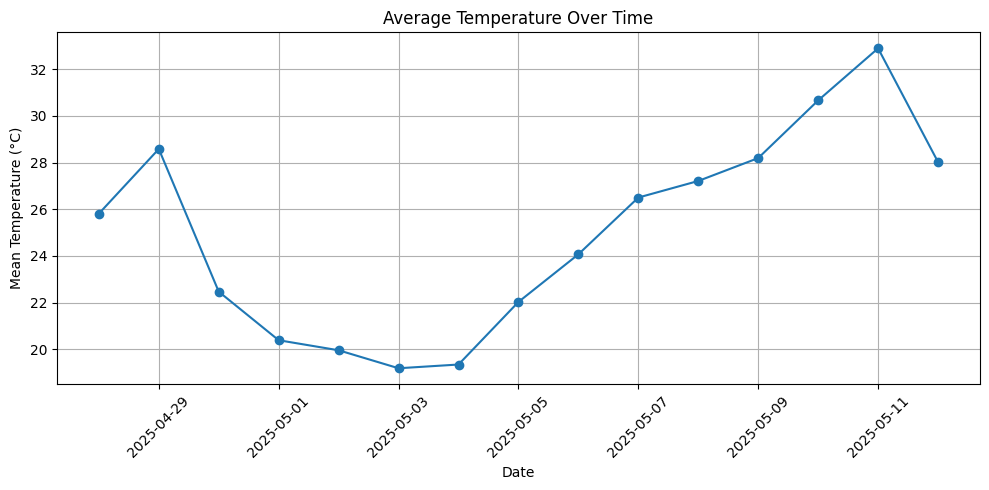

In [81]:

#line graph
plt.figure(figsize=(10, 5))
plt.plot(daily_dataframe['only_date'], daily_dataframe['temperature_2m_mean'], marker='o')
plt.title('Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

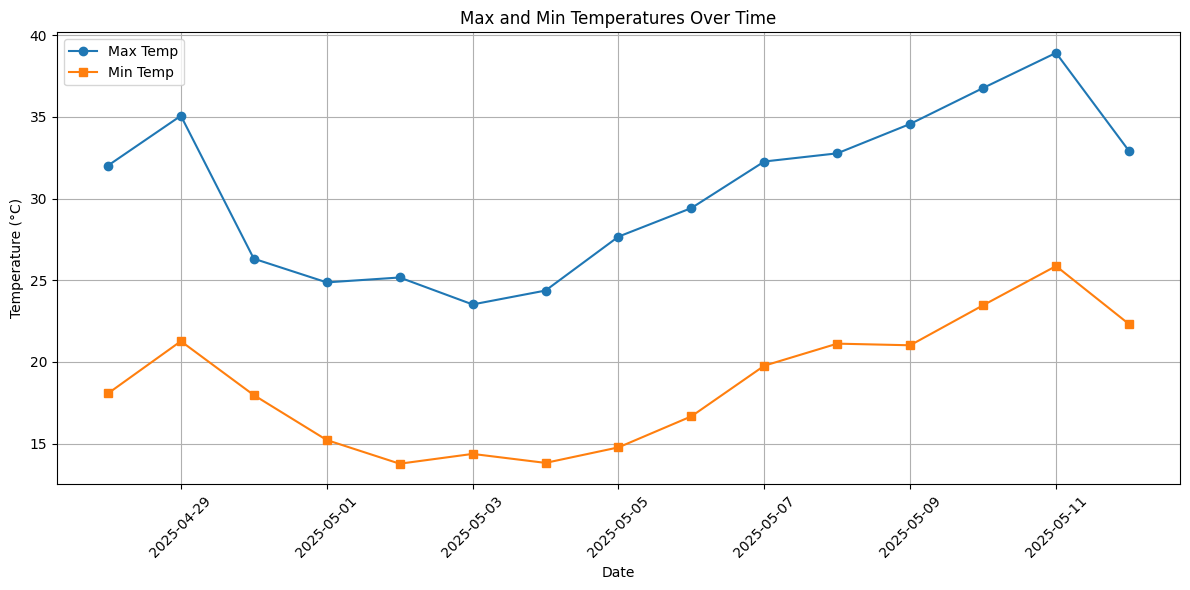

In [82]:
#line plot between min and max temperature
plt.figure(figsize=(12, 6))

# Plot both max and min temperatures
plt.plot(daily_dataframe['only_date'], daily_dataframe['temperature_2m_max'], marker='o', label='Max Temp')
plt.plot(daily_dataframe['only_date'], daily_dataframe['temperature_2m_min'], marker='s', label='Min Temp')

plt.title('Max and Min Temperatures Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

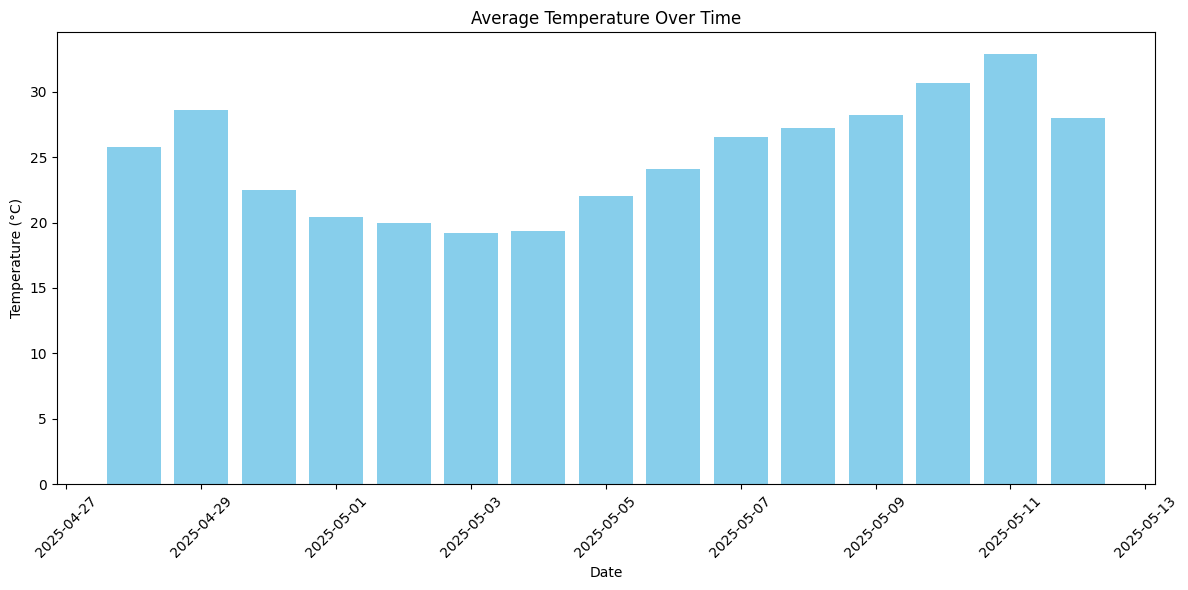

In [83]:

#bar plot between avg temperature over time
plt.figure(figsize=(12, 6))
plt.bar(daily_dataframe['only_date'], daily_dataframe['temperature_2m_mean'], color='skyblue')

plt.title('Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

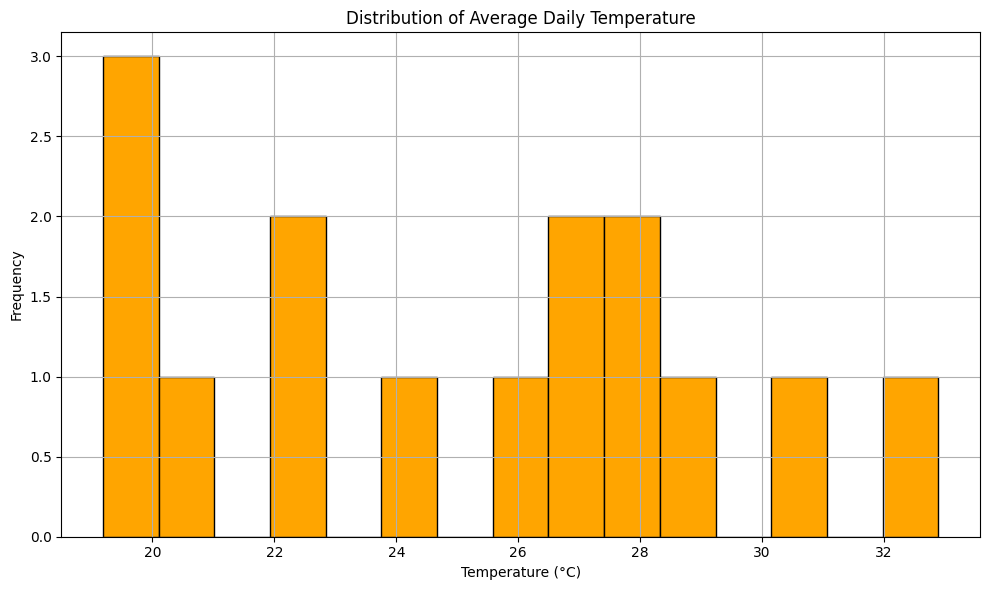

In [84]:
#histogram
plt.figure(figsize=(10, 6))
plt.hist(daily_dataframe['temperature_2m_mean'].dropna(), bins=15, color='orange', edgecolor='black')

plt.title('Distribution of Average Daily Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

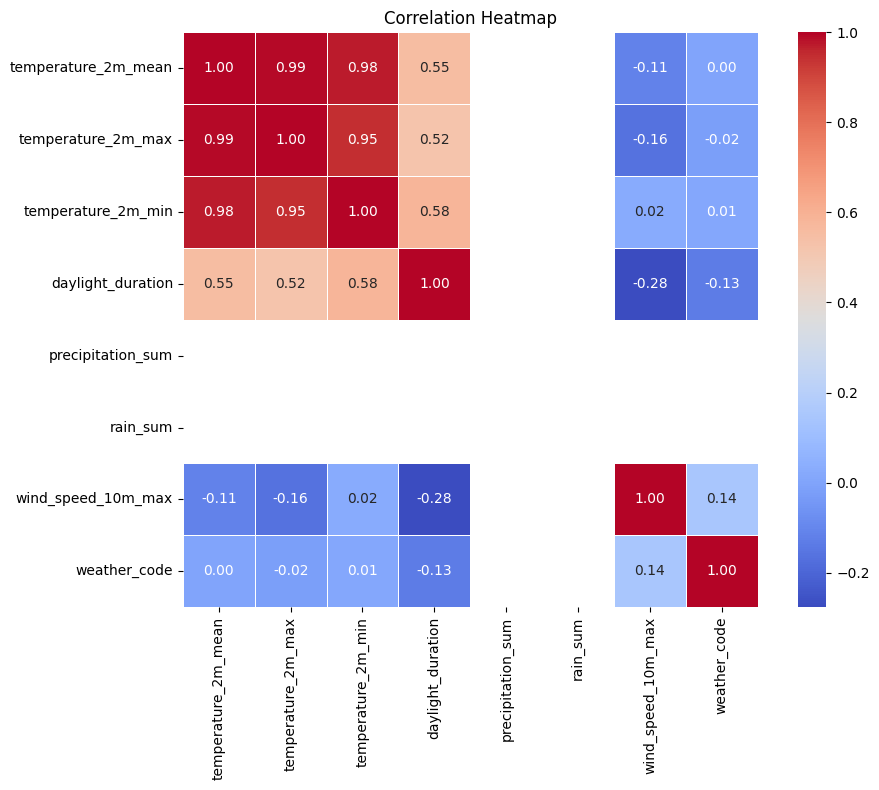

In [85]:
# correlation matrix of numeric columns
corr = daily_dataframe.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)

plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

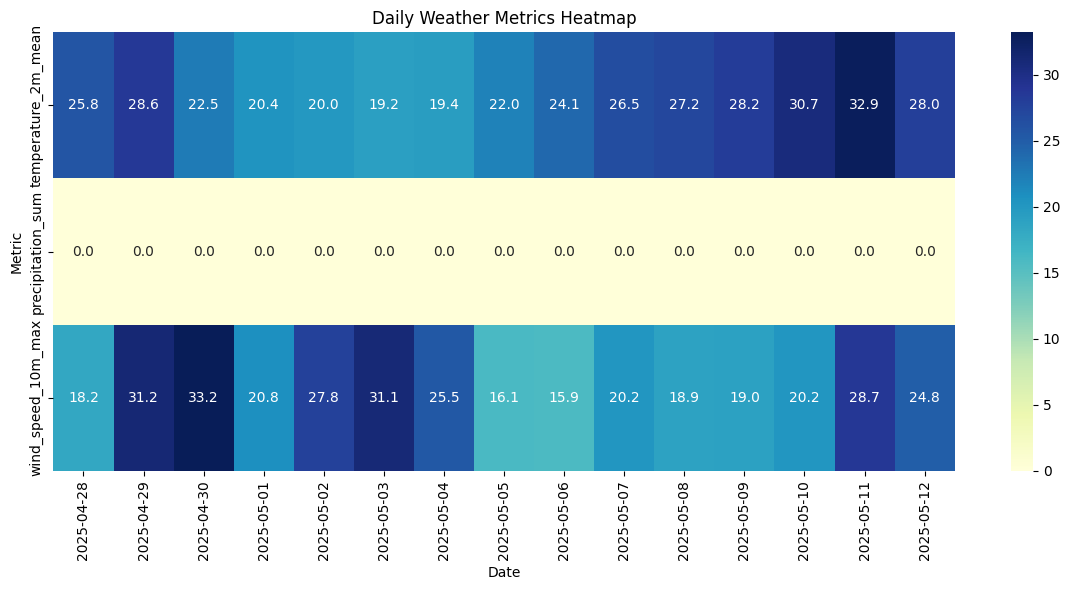

In [86]:
# Subset with date as index and a few features
subset = daily_dataframe.set_index('only_date')[
    ['temperature_2m_mean', 'precipitation_sum', 'wind_speed_10m_max']
]

plt.figure(figsize=(12, 6))
sns.heatmap(subset.T, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('Daily Weather Metrics Heatmap')
plt.xlabel('Date')
plt.ylabel('Metric')
plt.tight_layout()
plt.show()

In [87]:
# Ensure numeric columns for correlation
numeric_cols = [
    'temperature_2m_mean', 'temperature_2m_max', 'temperature_2m_min',
    'wind_speed_10m_max', 'precipitation_sum', 'rain_sum',
    'daylight_duration', 'weather_code'
]

# Compute correlation matrix
corr_matrix = daily_dataframe[numeric_cols].corr()


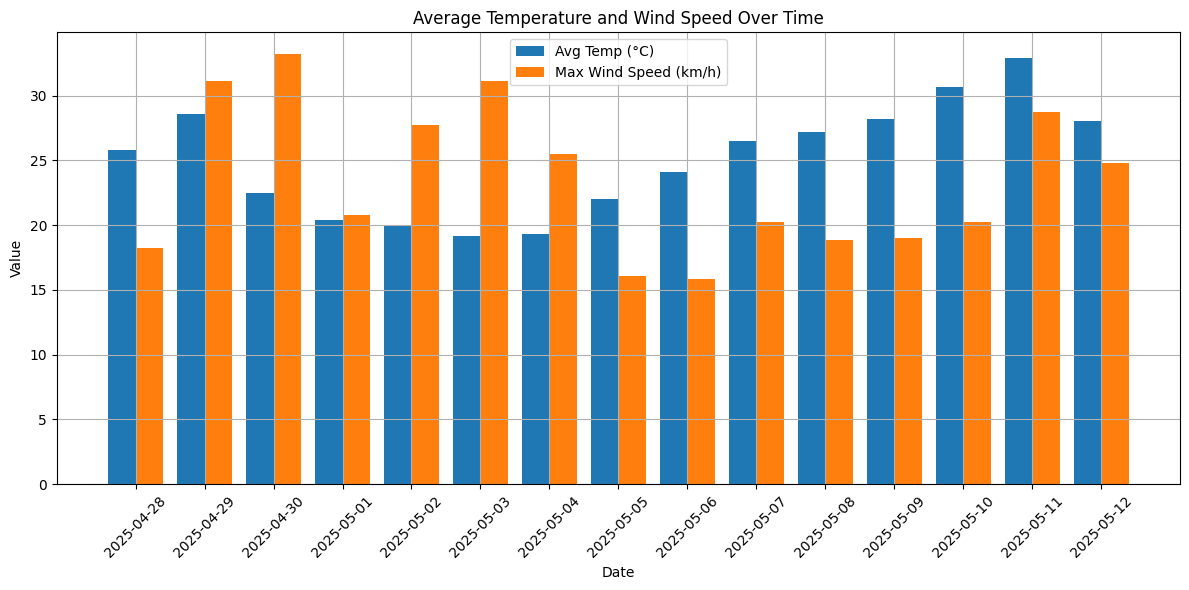

In [88]:
# Define x-axis positions and bar width
x = np.arange(len(daily_dataframe))
width = 0.4

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, daily_dataframe['temperature_2m_mean'], width, label='Avg Temp (°C)')
plt.bar(x + width/2, daily_dataframe['wind_speed_10m_max'], width, label='Max Wind Speed (km/h)')

# Labels and formatting
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Average Temperature and Wind Speed Over Time')
plt.xticks(x, daily_dataframe['only_date'], rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


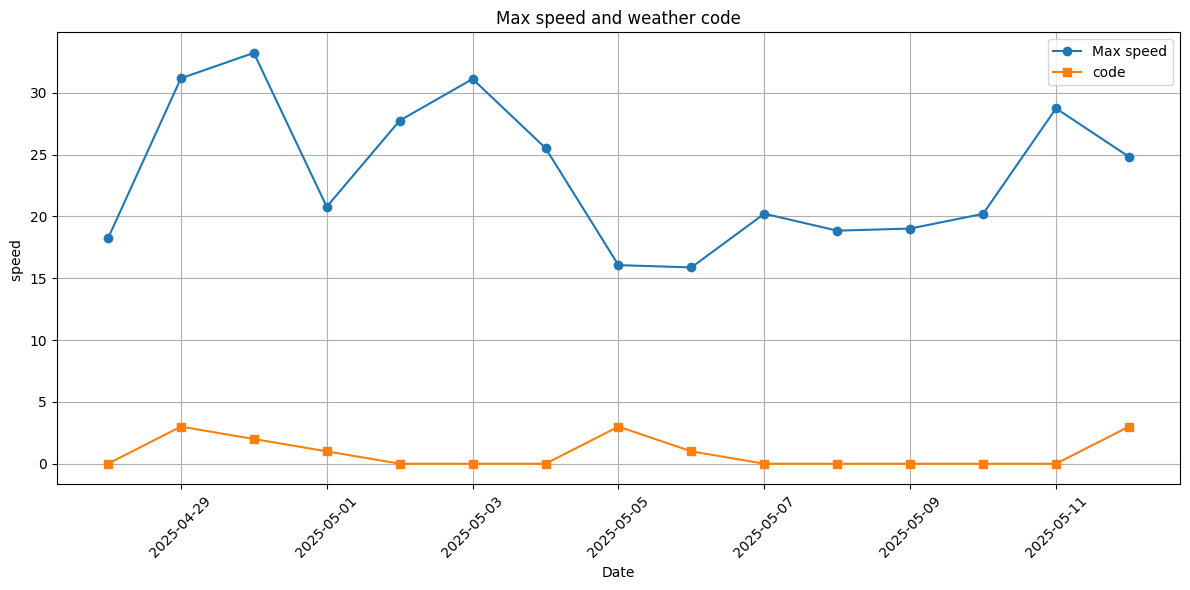

In [89]:
#line plot between weather code and max speed
plt.figure(figsize=(12, 6))

# Plot both weather code and max speed
plt.plot(daily_dataframe['only_date'], daily_dataframe['wind_speed_10m_max'], marker='o', label='Max speed')
plt.plot(daily_dataframe['only_date'], daily_dataframe['weather_code'], marker='s', label='code')

plt.title('Max speed and weather code')
plt.xlabel('Date')
plt.ylabel('speed ')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

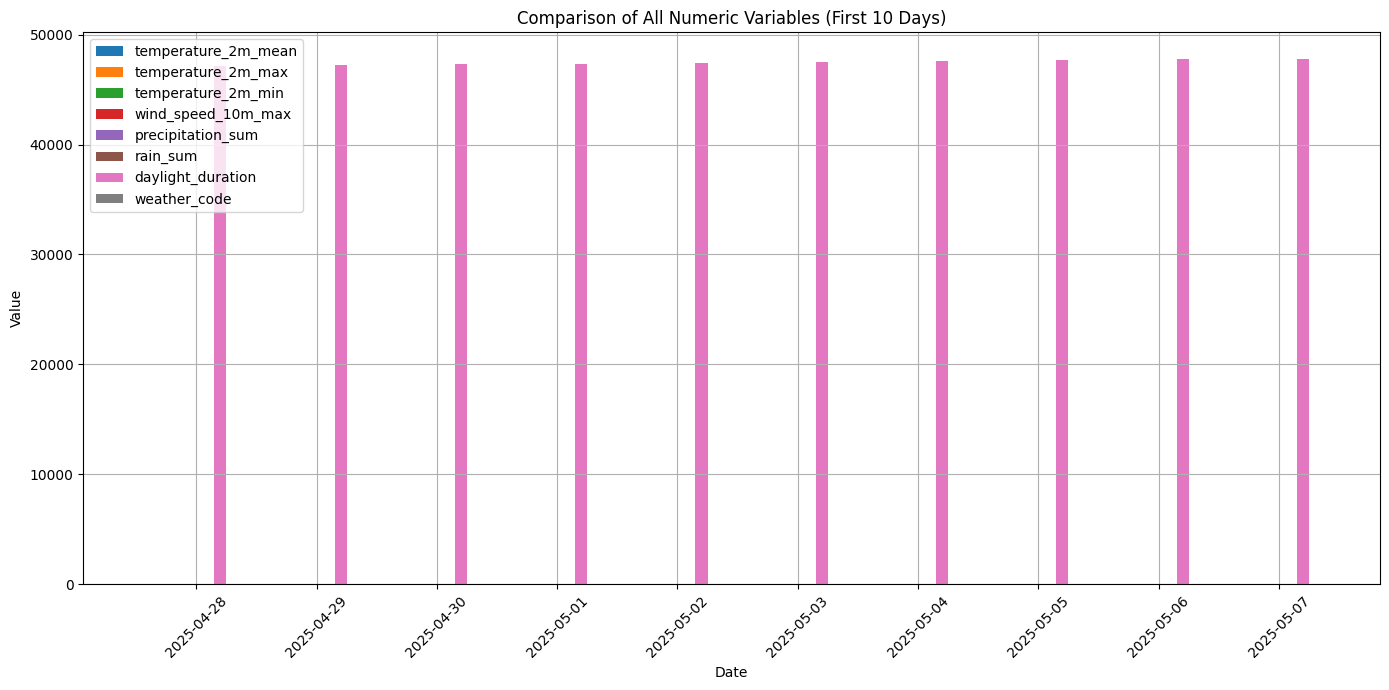

In [90]:
#few rows (e.g., 10)
subset = daily_dataframe.iloc[:10] 
x = np.arange(len(subset)) 
width = 0.8 / len(numeric_cols)  

# Plot setup
plt.figure(figsize=(14, 7))

# Loop through numeric columns and plot each as a bar
for i, col in enumerate(numeric_cols):
    plt.bar(x + i * width, subset[col], width, label=col)

# Labeling
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Comparison of All Numeric Variables (First 10 Days)')
plt.xticks(x + width * len(numeric_cols) / 2, subset['only_date'].astype(str), rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()